Importing the necessary libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

#Libraries to plot
import seaborn as sn

#Libraries to find the metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

Defining the functions required for Logistic regression

First we define the logistic function for the logistic regression which is 
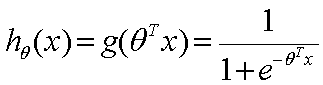

where 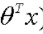 is defined as mx+b where m and b are weights and bias.

This function is also known as sigmoid function which returns the values between 0 and 1.

In [60]:
#first we define for mx+c which is a line
def hypline(m,X,b):
  return np.dot(m, X.T)+ b


In [61]:
#Now we define the logistic hypothesis function
def regfunc(m,X,b):
  hyp=hypline(m,X,b)
  return 1/(1+np.exp(-(hyp)))

The log likelihood for the maximising of a logistic function is

     = ylog(h(x))+(1-y)log(1-h(x))

Derivative of this we would get the cross entropy loss function which is

    = -(y log(h(x) + (1-y) log(1-h(x)))

where y is the actual value and h(x) is the predicted value.

In [62]:
def hyploss(m,X,b,Y):
  r=regfunc(m,X,b)
  p=0.0099 #when predicted value r is 0, then the log(0) tends to become undefined, so to avoid that, we added a small value p (So that it never becomes 0).
  return np.mean(-(Y*np.log(r+p)+(1-Y)*np.log(1-r+p)))

In [63]:
def grad_m(m,X,b,Y):
  k=regfunc(m,X,b)
  return np.mean((k-Y).T*X, axis=0)

In [64]:
def grad_b(m,X,b,Y):
  k=regfunc(m,X,b)
  return np.mean(k-Y)

In [65]:
def accuracy(m,X,b,Y):
  Y_pred=regfunc(m,X,b)
  Y_pred[Y_pred>=0.5]=1
  Y_pred[Y_pred<0.5]=0
  print("Confusion Matrix")
  cm = confusion_matrix(Y_pred[0],Y)
  print("Classification Report")
  print(classification_report(Y,Y_pred[0],target_names=None))
  print(cm)
  co=len(Y_pred[Y_pred==Y])
  return (co/len(Y.T))*100

In [66]:
def dfdata_minmax(df_data):
    mm = list()
    for i in range(len(df_data[0])):
        col_values = [row[i] for row in df_data]
        val_min = min(col_values)
        val_max = max(col_values)
        mm.append([val_min, val_max])
    return mm

In [67]:
def normalize_df_data(df_data, mm):
    for row in df_data:
      k=len(row)
      for i in range(k):
        row[i] = (row[i] - mm[i][0]) / (mm[i][1] - mm[i][0])

In [68]:
def errorfunc(X,Y):
  error={}
  m=np.random.randn(1,X.shape[1])
  b=random.random()
  l=7
  for i in range(-3,4):
    m=m-l*grad_m(m,X,b,Y)
    b=b-l*grad_b(m,X,b,Y)
    error[i]=hyploss(m,X,b,Y)
  print("Accuracy of the data")
  print(accuracy(m,X,b,Y))

  my_error=error.items()
  my_error=sorted(my_error)
  l,k =zip(*my_error)
  plt.plot(l,k)
  plt.show()

In [69]:
def plot(df_data,columns):
  for i in columns:
    sn.displot(df_data[i])
    qt = df_data[i].quantile(0.99)
    df_data = df_data[df_data[i] < qt]
    sn.displot(df_data[i])
  return df_data

Loading the dataset

In [70]:
#reading the csv file using pandas
df_data=pd.read_csv("/winequality-red.csv")

Data Preprocessing

In [71]:
#Printing the information of the dataset
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [72]:
#Describing all the attributes of the dataset
df_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Plots for each and every column


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


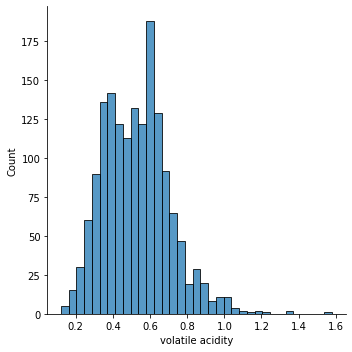

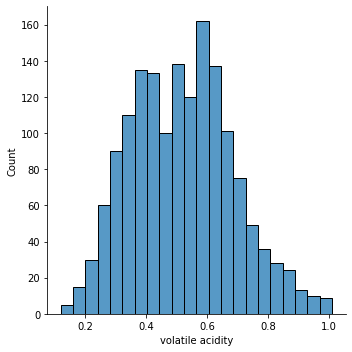

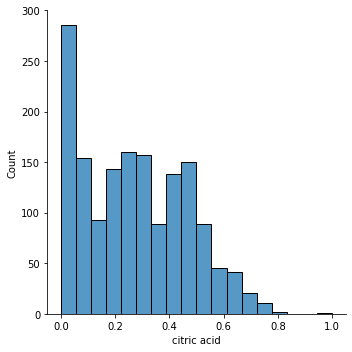

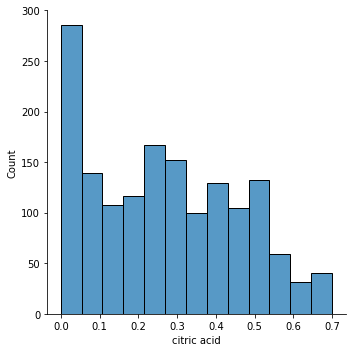

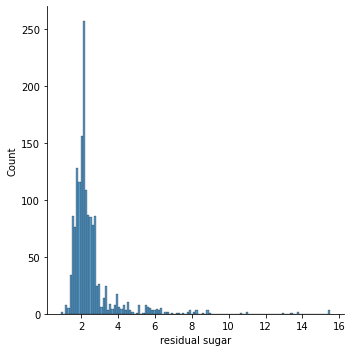

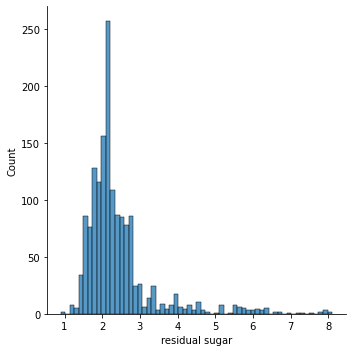

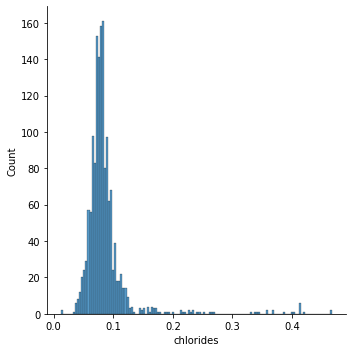

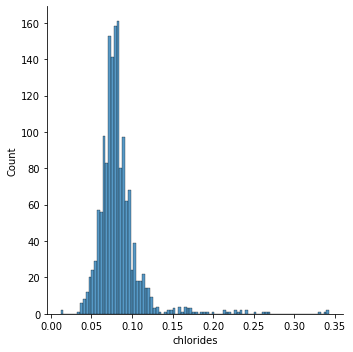

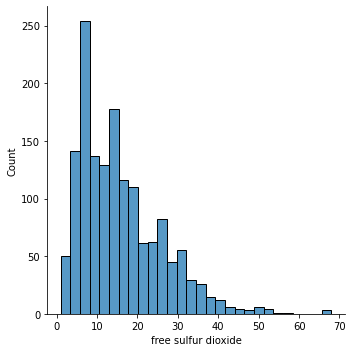

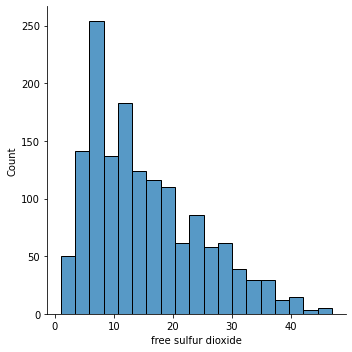

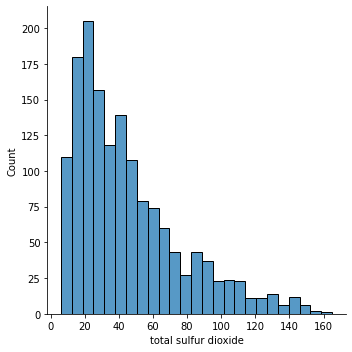

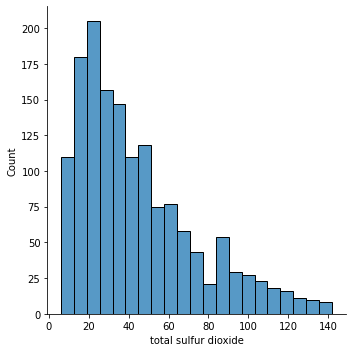

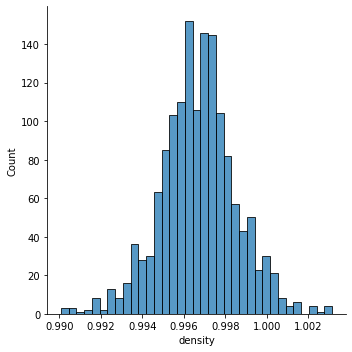

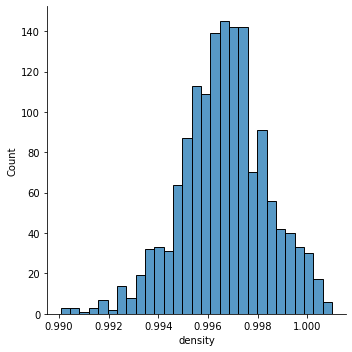

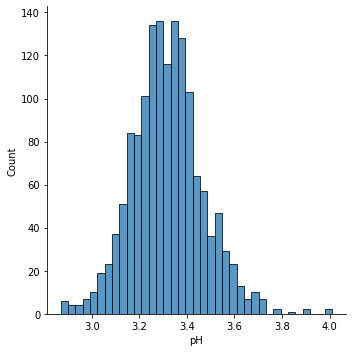

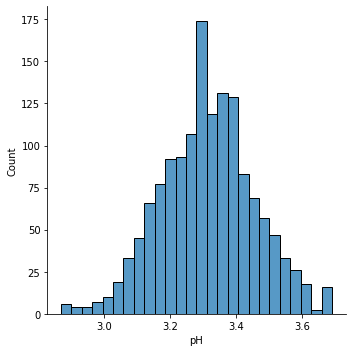

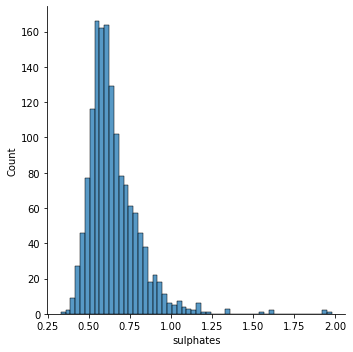

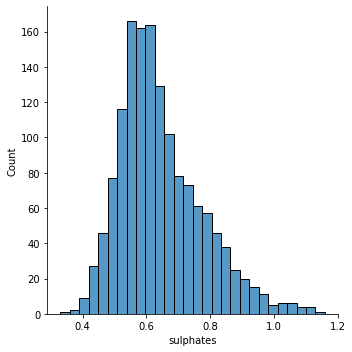

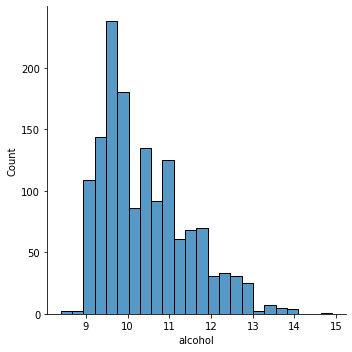

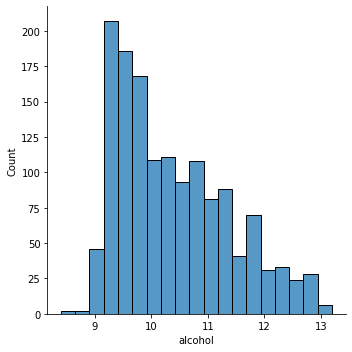

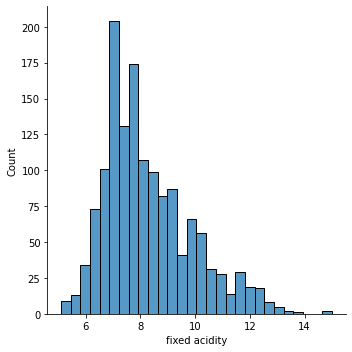

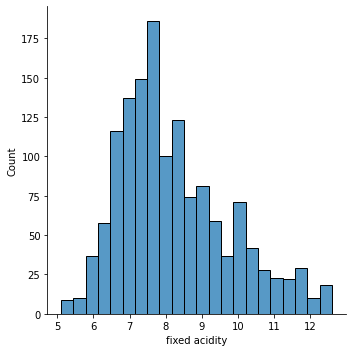

In [73]:
#For each column printing the plot for their count 
columns=['volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','fixed acidity']
print("Plots for each and every column")
df_data=plot(df_data,columns)

In [74]:
#Finding the variance_inflation_factor for each and every attribute 
columns = df_data[[ 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol','fixed acidity',]]
z = add_constant(columns)
VIF = pd.DataFrame()
VIF['VIF'] = [variance_inflation_factor(z.values,i) for i in range (z.shape[1])]
VIF['features'] = z.columns
VIF

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,VIF,features
0,2.040531e+06,const
1,1.969338e+00,volatile acidity
2,3.086508e+00,citric acid
3,1.526052e+00,residual sugar
4,1.148716e+00,chlorides
5,2.007742e+00,free sulfur dioxide
6,2.281380e+00,total sulfur dioxide
7,5.819296e+00,density
8,2.997420e+00,pH
9,1.322855e+00,sulphates


In [75]:
#Changing the target variable values to boolean 
predicted_by_quality=[]
for i in df_data['quality']:
  if i >6.5:
    predicted_by_quality.append(1)
  else:
    predicted_by_quality.append(0)
df_data['updated_quality']=predicted_by_quality
df_data.drop('quality', axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of the data
Confusion Matrix
Classification Report
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       386
           1       0.00      0.00      0.00        40

    accuracy                           0.91       426
   macro avg       0.45      0.50      0.48       426
weighted avg       0.82      0.91      0.86       426

[[386  40]
 [  0   0]]
90.61032863849765


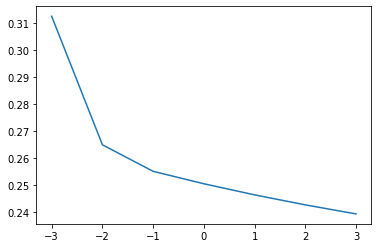

In [76]:
h=(int)(df_data.shape[0]*0.7)
training_data = df_data.iloc[:h]
testing_data = df_data.iloc[h:]
X_train=training_data.drop(['updated_quality'], axis=1)
Y_train=training_data['updated_quality']

X_test=testing_data.drop(['updated_quality'], axis=1)
Y_test=testing_data['updated_quality']
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)
X_test = np.asarray(X_test)
Y_test = np.asarray(Y_test)
X_train_min_max = X_train.copy()
normalize_df_data(X_train_min_max,dfdata_minmax(X_train_min_max))

X_test_min_max = X_test.copy()
normalize_df_data(X_test_min_max,dfdata_minmax(X_test_min_max))


errorfunc(X_test_min_max,Y_test)

In [77]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
ypred = dtc.predict(X_test)
accuracy_dtc = metrics.accuracy_score(ypred,Y_test)
accuracy_dtc

0.8098591549295775

In [78]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
ypred = knn.predict(X_test)
accuracy_knn = metrics.accuracy_score(ypred,Y_test)
accuracy_knn

0.8732394366197183